<a href="https://colab.research.google.com/github/RM-RAMASAMY/exploring_timegpt_tabula9_and_relational_deep_learning/blob/main/bitcoin_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
#| hide
!pip install -Uqq nixtla cryptocmd

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.5/47.5 kB 3.4 MB/s eta 0:00:00


In [9]:
#| hide
from nixtla.utils import in_colab

In [10]:
#| hide
IN_COLAB = in_colab()

In [11]:
#| hide
if not IN_COLAB:
    from nixtla.utils import colab_badge
    from dotenv import load_dotenv

In [12]:
#| echo: false
if not IN_COLAB:
    load_dotenv()
    colab_badge('docs/use-cases/2_bitcoin_price_prediction')

In [13]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/Nixtla/transfer-learning-time-series/main/datasets/bitcoin_price_usd.csv', sep=',')
df.head()

,Date,Close
0,2020-01-01,7200.174316
1,2020-01-02,6985.470215
2,2020-01-03,7344.884277
3,2020-01-04,7410.656738
4,2020-01-05,7411.317383


In [14]:
df.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)

In [15]:
from nixtla import NixtlaClient

In [16]:
nixtla_client = NixtlaClient(
    # defaults to os.environ.get("NIXTLA_API_KEY")
    api_key = 'nixak-Ueju3CiukedCmi4rLjfWXFO9r7ZdQj95PSIrucy9c3lblxLQ9HJIOQhOHHVtJ1Ps5ZNPylSfOcLNupkY'
)

In [17]:
#| hide
if not IN_COLAB:
    nixtla_client = NixtlaClient()

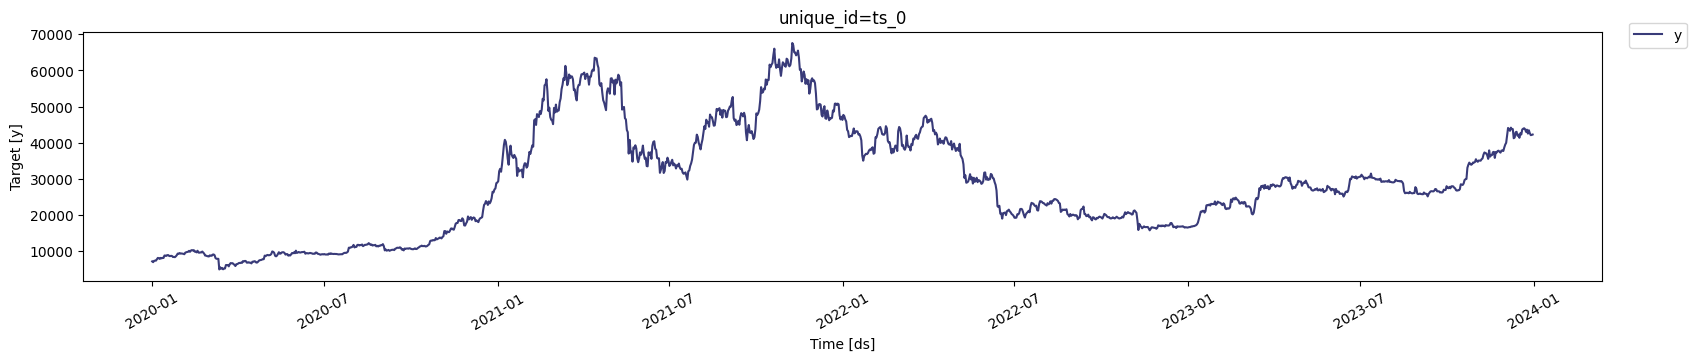

In [18]:
nixtla_client.plot(df)

If you haven't renamed the column names of your DataFrame to `ds` and `y`, you will need to specify the `time_col` and `target_col` arguments of the `plot`method:

``` python
nixtla_client.plot(df, time_col='name of your time column', target_col='name of your target column')
```

This is necessary not only for the `plot` method but for all methods from the `NixtlaClient` class.

In [19]:
level = [50,80,90] # confidence levels

fcst = nixtla_client.forecast(df, h=7, level=level)
fcst.head()

,ds,TimeGPT,TimeGPT-hi-50,TimeGPT-hi-80,TimeGPT-hi-90,TimeGPT-lo-50,TimeGPT-lo-80,TimeGPT-lo-90
0,2024-01-01,42269.460,43158.164,44109.050,44971.670,41380.758,40429.870,39567.250
1,2024-01-02,42469.918,43473.414,44361.574,45241.890,41466.420,40578.260,39697.945
2,2024-01-03,42864.080,43443.895,44141.930,45189.332,42284.260,41586.227,40538.824
3,2024-01-04,42881.620,43704.770,44547.130,45160.117,42058.473,41216.113,40603.125
4,2024-01-05,42773.457,44057.152,44881.527,45333.210,41489.760,40665.387,40213.703


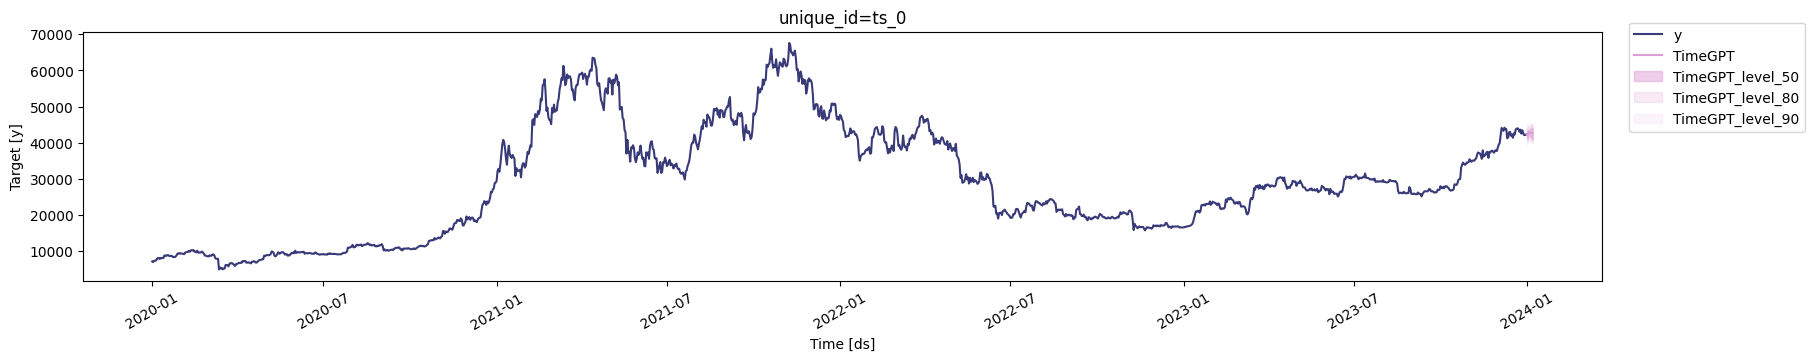

In [20]:
nixtla_client.plot(df, fcst, level=level)

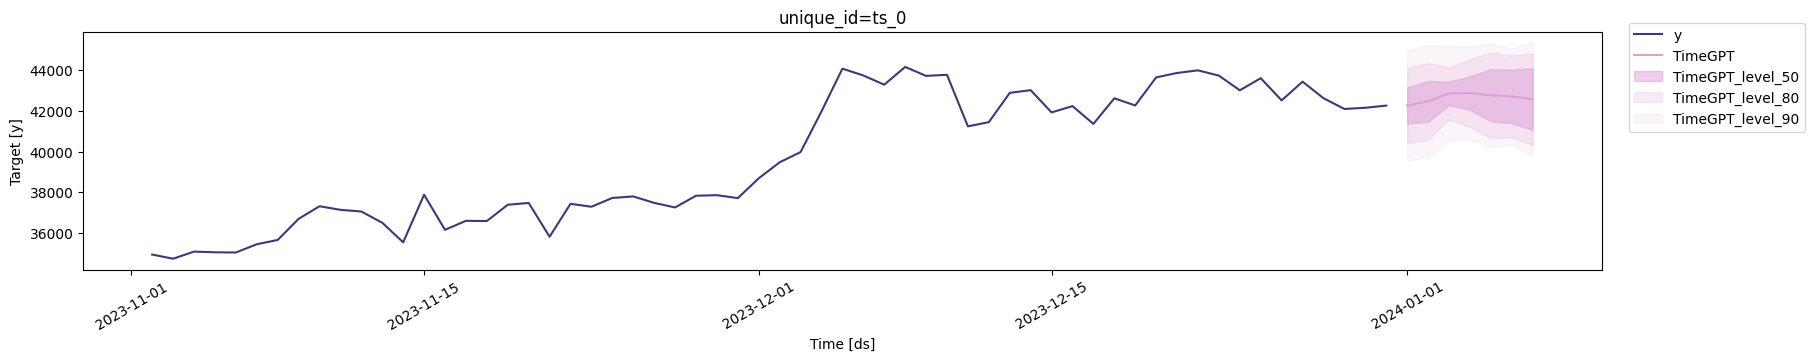

In [21]:
nixtla_client.plot(df, fcst, level=level, max_insample_length=60)

In [22]:
forecast = nixtla_client.forecast(df, h=7, level=level, add_history=True)
forecast.head()

,ds,TimeGPT,TimeGPT-hi-50,TimeGPT-hi-80,TimeGPT-hi-90,TimeGPT-lo-50,TimeGPT-lo-80,TimeGPT-lo-90
0,2020-02-03,9425.740,11229.343,12852.642,13824.121,7622.1370,5998.8384,5027.3594
1,2020-02-04,9568.520,11372.122,12995.421,13966.900,7764.9165,6141.6177,5170.1387
2,2020-02-05,9557.102,11360.704,12984.003,13955.482,7753.4985,6130.1997,5158.7207
3,2020-02-06,9486.128,11289.730,12913.029,13884.509,7682.5250,6059.2260,5087.7470
4,2020-02-07,9475.263,11278.865,12902.164,13873.644,7671.6597,6048.3610,5076.8820


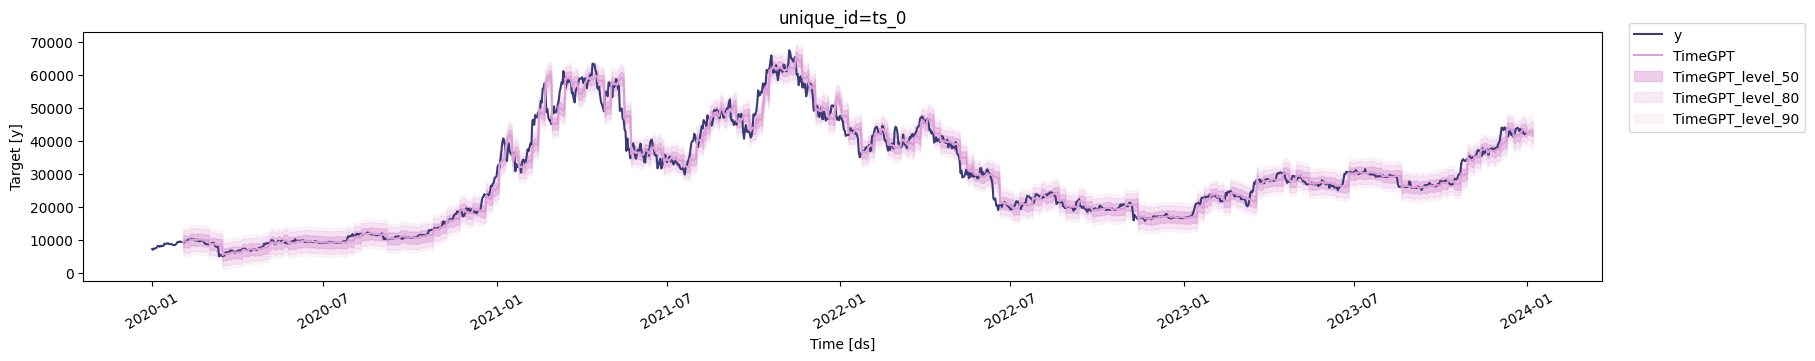

In [23]:
nixtla_client.plot(df, forecast, level=level)

In [24]:
anomalies_df = nixtla_client.detect_anomalies(df)

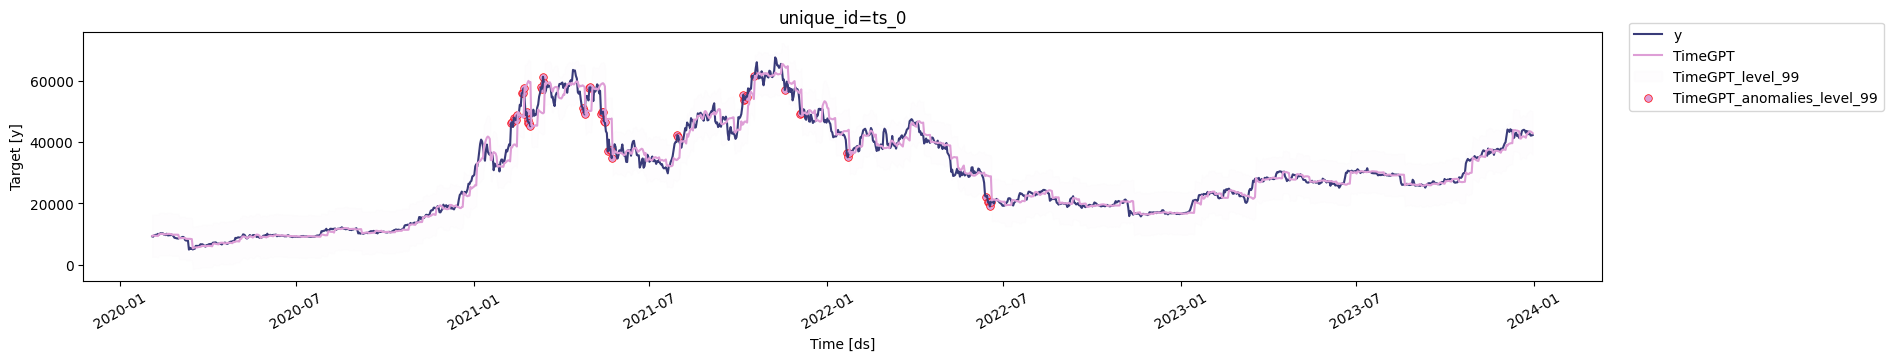

In [25]:
nixtla_client.plot(df, anomalies_df, plot_anomalies=True)

In [ ]:
#| hide
!pip install -Uqq nixtla cryptocmd

In [ ]:
#| hide
from nixtla.utils import in_colab

In [ ]:
#| hide
IN_COLAB = in_colab()

In [ ]:
#| hide
if not IN_COLAB:
    from nixtla.utils import colab_badge
    from dotenv import load_dotenv

In [ ]:
#| echo: false
if not IN_COLAB:
    load_dotenv()
    colab_badge('docs/use-cases/2_bitcoin_price_prediction')

[![](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Nixtla/nixtla/blob/main/nbs/docs/use-cases/2_bitcoin_price_prediction.ipynb)

In [ ]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/Nixtla/transfer-learning-time-series/main/datasets/bitcoin_price_usd.csv', sep=',')
df.head()

,Date,Close
0,2020-01-01,7200.174316
1,2020-01-02,6985.470215
2,2020-01-03,7344.884277
3,2020-01-04,7410.656738
4,2020-01-05,7411.317383


In [ ]:
df.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)

In [ ]:
from nixtla import NixtlaClient

In [ ]:
nixtla_client = NixtlaClient(
    # defaults to os.environ.get("NIXTLA_API_KEY")
    api_key = 'my_api_key_provided_by_nixtla'
)

In [ ]:
#| hide
if not IN_COLAB:
    nixtla_client = NixtlaClient()

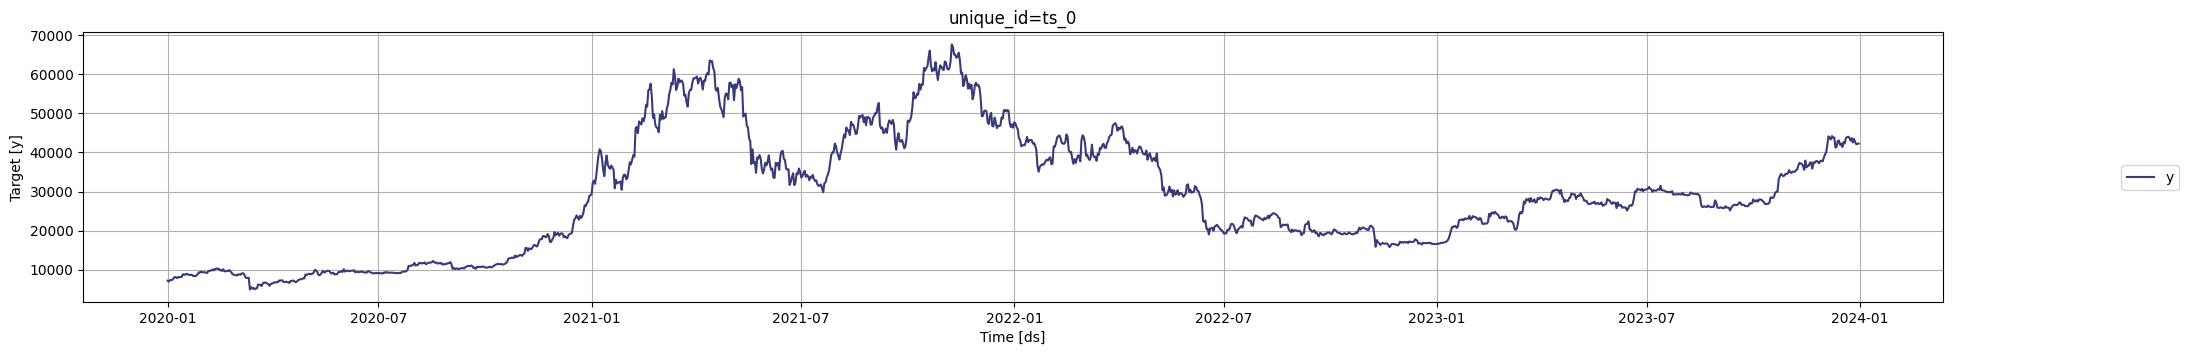

In [ ]:
nixtla_client.plot(df)

If you haven't renamed the column names of your DataFrame to `ds` and `y`, you will need to specify the `time_col` and `target_col` arguments of the `plot`method:

``` python
nixtla_client.plot(df, time_col='name of your time column', target_col='name of your target column')
```

This is necessary not only for the `plot` method but for all methods from the `NixtlaClient` class.

In [ ]:
level = [50,80,90] # confidence levels

fcst = nixtla_client.forecast(df, h=7, level=level)
fcst.head()

INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Inferred freq: D
INFO:nixtla.nixtla_client:Restricting input...
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...


,ds,TimeGPT,TimeGPT-lo-90,TimeGPT-lo-80,TimeGPT-lo-50,TimeGPT-hi-50,TimeGPT-hi-80,TimeGPT-hi-90
0,2024-01-01,42269.460938,39567.209020,40429.953636,41380.654646,43158.267229,44108.968239,44971.712855
1,2024-01-02,42469.917969,39697.941669,40578.197049,41466.511361,43473.324576,44361.638888,45241.894268
2,2024-01-03,42864.078125,40538.871243,41586.252507,42284.316674,43443.839576,44141.903743,45189.285007
3,2024-01-04,42881.621094,40603.117448,41216.106493,42058.539392,43704.702795,44547.135694,45160.124739
4,2024-01-05,42773.457031,40213.699760,40665.384780,41489.812431,44057.101632,44881.529282,45333.214302


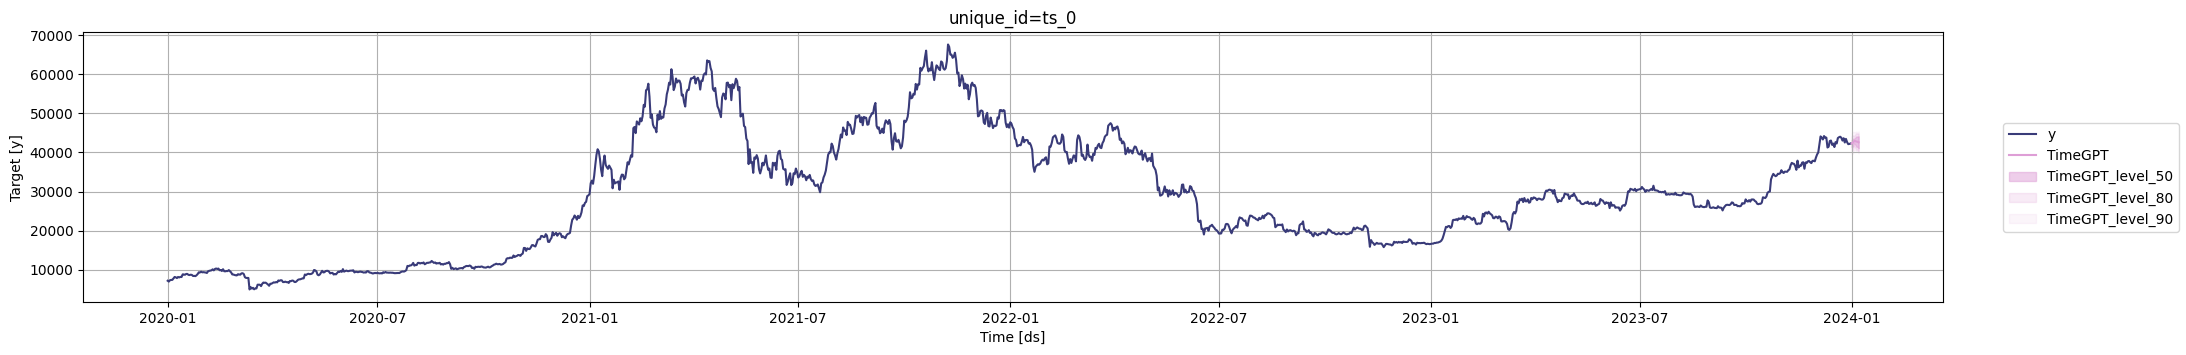

In [ ]:
nixtla_client.plot(df, fcst, level=level)

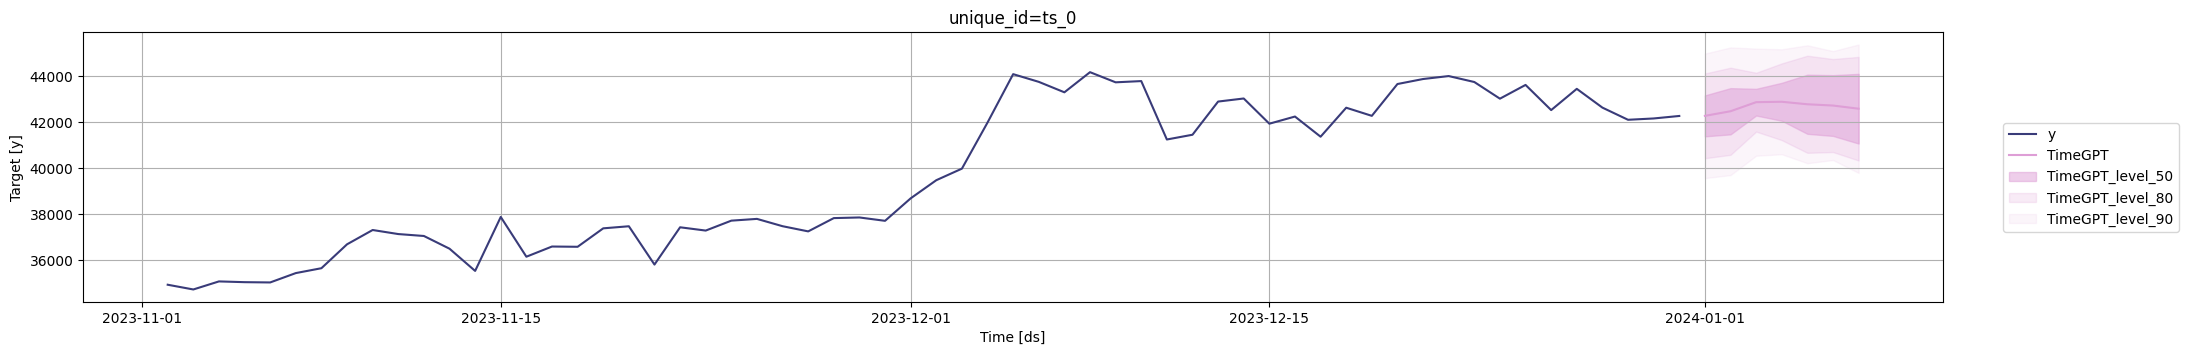

In [ ]:
nixtla_client.plot(df, fcst, level=level, max_insample_length=60)

In [ ]:
forecast = nixtla_client.forecast(df, h=7, level=level, add_history=True)
forecast.head()

INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Inferred freq: D
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...
INFO:nixtla.nixtla_client:Calling Historical Forecast Endpoint...


,ds,TimeGPT,TimeGPT-lo-50,TimeGPT-lo-80,TimeGPT-lo-90,TimeGPT-hi-50,TimeGPT-hi-80,TimeGPT-hi-90
0,2020-02-03,9425.702148,7622.287194,5999.157479,5027.779677,11229.117103,12852.246818,13823.624619
1,2020-02-04,9568.482422,7765.067467,6141.937752,5170.559951,11371.897376,12995.027092,13966.404893
2,2020-02-05,9557.082031,7753.667077,6130.537362,5159.159560,11360.496986,12983.626701,13955.004502
3,2020-02-06,9486.123047,7682.708092,6059.578377,5088.200576,11289.538001,12912.667717,13884.045518
4,2020-02-07,9475.242188,7671.827233,6048.697518,5077.319716,11278.657142,12901.786857,13873.164659


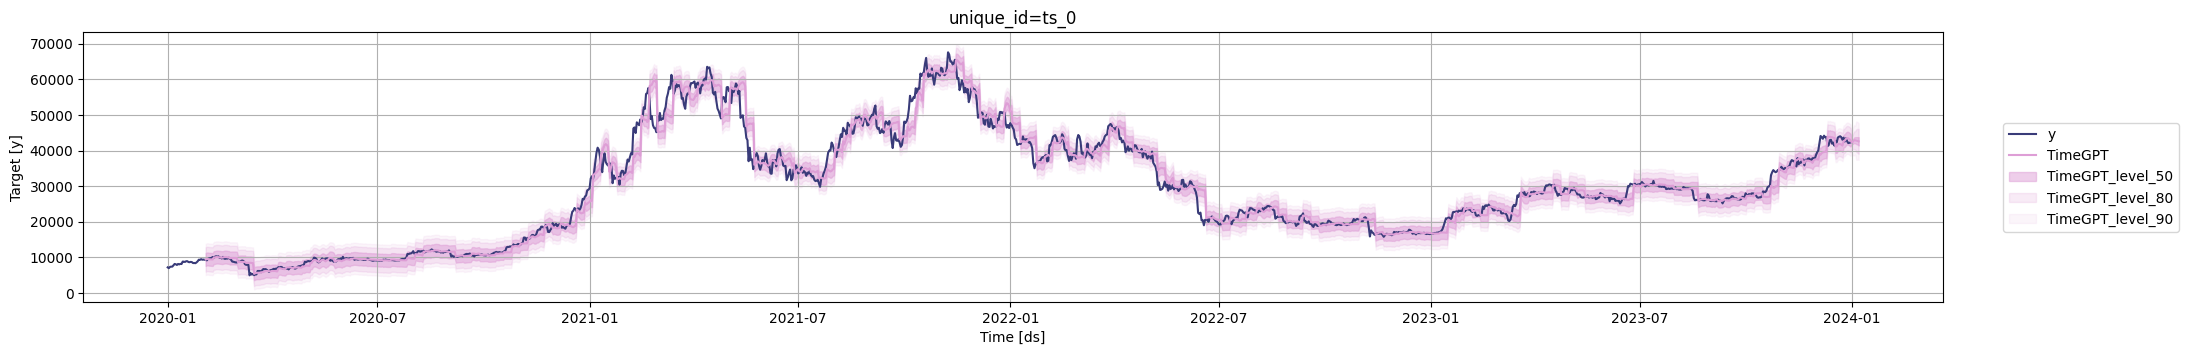

In [ ]:
nixtla_client.plot(df, forecast, level=level)

In [ ]:
anomalies_df = nixtla_client.detect_anomalies(df)

INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Inferred freq: D
INFO:nixtla.nixtla_client:Calling Anomaly Detector Endpoint...


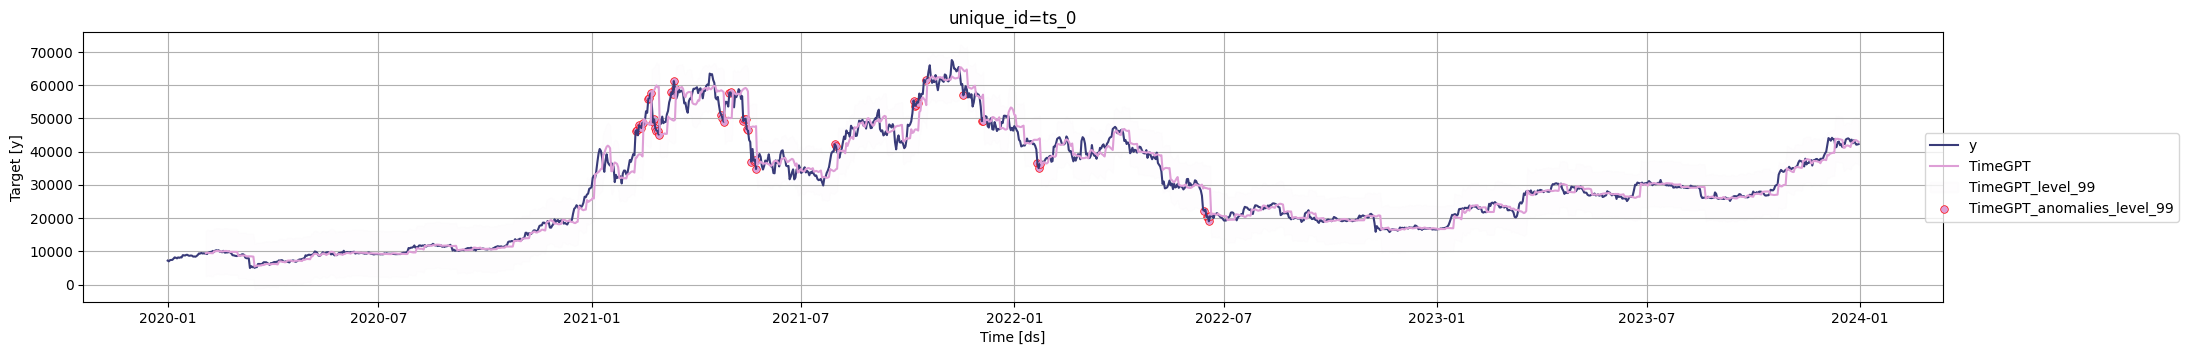

In [ ]:
nixtla_client.plot(df, anomalies_df, plot_anomalies=True)